# Kohonen's Self Organizing Map (KSOM)

KSOM is an unsupervised network which works using Competitive Learning. It is capable of recognizing inputs that are similar to one another. 

KSOMs generate a topographical mapping from the input to the output and results in dimensionality reduction

## KSOM Algorithm
1. Initialize all weights to small random values and set initial values for the learning rate $\alpha$ and the neighbourhood size $N_{c}$.
2. Choose an input pattern $x$ and pass it through the network.
3. Select winning unit $c$ that minimizes the performance index $I$, where 

$I = ||x-w_{c}|| = min_{ij} ||x-w_{ij}||$ 
4. Update weights of the nodes *in the neighbourhood* using the following update rule:

$w_{ij} (k+1) = w_{ij}(k) + \eta \alpha (k) [x-w_{ij}(k)]$
5. Update the learning rate and the neighborhood size according an appropraite scheme after each epoch. In our problem, we use the following:
    1. $\alpha (k) = \alpha (0) (1-\frac{k}{T+1})$
    
    Where $\alpha(0) = 0.8$ and $T$ is the total number of epochs (1000). Once $k$ reaches 90, keep the learning rate constant
    
    2. $N_{c}$ decreases by 1 every 2 epochs until it reaches 0.
    
6. Repeat from step 2 until all input patterns are used, then start a new epoch. Repeat the process until the number of epochs reach the maximum specified value.

Note: $\eta = 1$ for every node in the neighborhood, otherwise, 0.

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display

### Input Data
The training input of the SOM are 24 colors (use shades of red, green, blue, with some yellow, teal and pink). 

The following link can help in obtaining these values: http://www.rapidtables.com/web/color/RGB_Color.htm

(24, 3)


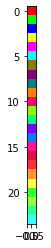

In [2]:
# inputRGB = np.array([
#     [255,0,0],
#     [220,20,60],
#     [178,34,34],
#     [139,0,0],
#     [205,92,92],
#     [255,69,0],
#     [85,107,47],
#     [0,128,0],
#     [127,255,0],
#     [46,139,87],
#     [102,205,170],
#     [0,0,255],
#     [0,0,139],
#     [135,206,250],
#     [0,191,255],
#     [95,158,160],
#     [65,105,225],
#     [255,255,224],
#     [255,228,181],
#     [245,222,179],
#     [255,255,0],
#     [255,215,0],
#     [0,128,128],
#     [0,255,255]
# ])

# inputRGB = np.array([
#     [0,255,127],
#     [128,0,0],
#     [0,139,139],
#     [124,252,0],
#     [139,0,0],
#     [165,42,42],
#     [255,0,0],
#     [32,178,170],
#     [154,205,50],
#     [152,251,152],
#     [135,206,235],
#     [70,130,180],
#     [255,127,80],
#     [127,255,0],
#     [255,215,0],
#     [233,150,122],
#     [0,255,0],
#     [0,191,255],
#     [0,255,255],
#     [0,206,209],
#     [127,255,212],
#     [47,79,79],
#     [0,0,255],
#     [255,182,193],
#     [102,205,170],
#     [255,255,0],
# ])


inputRGB = np.array([
[255,0,0],
[0,255,0],
[0,0,255],
[255,255,0],
[255,0,255],
[0,255,255],
[128,128,0],
[128,0,128],
[0,128,128],
[255,128,0],
[255,0,128],
[128,255,0],
[0,255,128],
[128,0,255],
[0,128,255],
[255,20,147],
[220,20,60],
[255,51,51],
[255,153,51],
[255,255,51],
[51,255,51],
[153,255,51],
[51,255,153],
[51,255,255]])

# Normalize the input (min-max normalize, but we already know the minimum and maximum)
normRGB = inputRGB/255

plt.imshow(np.reshape(normRGB,(normRGB.shape[0],1,3)))
print(normRGB.shape)

Initialize all parameters

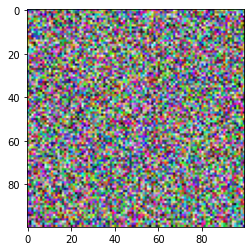

In [4]:
# Initialize the system
space_size = 100 # 100 x 100 grid of neurons
alpha_0 = 0.8
Nc = 20
max_epochs = 1000

# Initialize random weights
w = np.random.random((space_size,space_size,3))
# diff = np.abs(np.sum(normRGB[0] - w, axis=2))
plt.imshow(w)

KSOM Algorithm

Epoch Number: 1


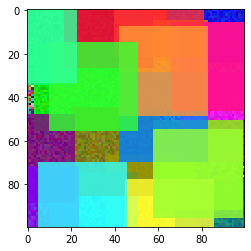

Epoch Number: 20


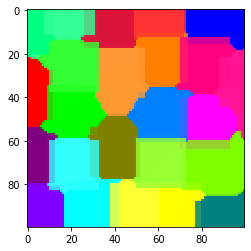

Epoch Number: 50


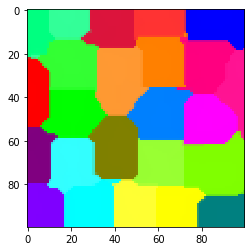

Epoch Number: 100


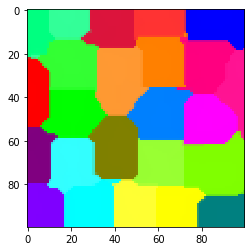

Epoch Number: 200


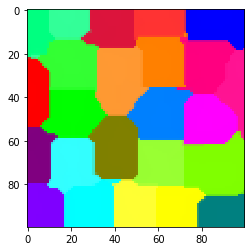

Epoch Number: 500


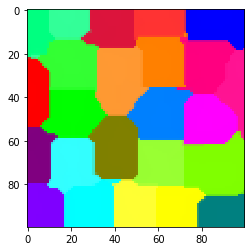

Epoch Number: 1000


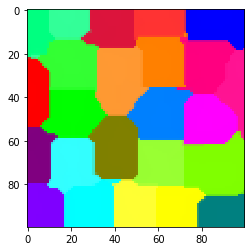

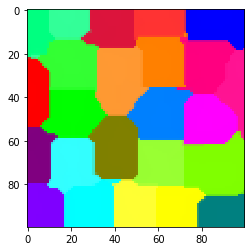

In [10]:
epoch = 1
alpha = alpha_0
while epoch <= max_epochs:
    
    for x in normRGB:
        # calculate performance index
        diff = np.linalg.norm(x - w, axis =2)
        # find index of winning node
        ind = np.unravel_index(np.argmin(diff, axis=None), diff.shape)


        # Update weights for neighbourhood
        for i in range(ind[0]-Nc, ind[0]+Nc+1):
            for j in range(ind[1]-Nc, ind[1]+Nc+1):
                if i >= 0 and j>=0 and i < space_size and j < space_size:
                    # make sure you don't exceed the size of the space
                    w[i][j] += alpha* (x-w[i][j])
        
    # decrease the learning rate by the given scheme
    if epoch <= 90:
        alpha = alpha_0* (1 - epoch/(max_epochs+1))
#         print("Learning rate decreased to {}".format(alpha))

    # Decrease the neighbourhood by 1 every 2 epochs
    if epoch%2 == 0 and Nc > 0:
        Nc -= 1 
#         print("Nc decreased to {}".format(Nc))

    plot_ind = [1, 20, 50, 100, 200, 500, 1000, 1500, 2000]
    if epoch in plot_ind:
        print("Epoch Number: {}".format(epoch))
        plt.imshow(w)
#         display.clear_output(wait=True)
        display.display(plt.gcf())
    
    
    epoch += 1

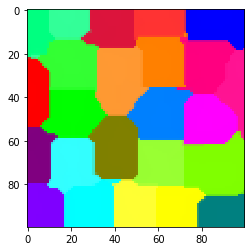

In [11]:
plt.imshow(w)

 [  314 / 1000 ]  31% - 0:00:00 left 

 [  684 / 1000 ]  68% - 0:00:00 left 

 [  976 / 1000 ]  98% - 0:00:00 left 

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 2.2069928162454036e-07
 topographic error: 0.0


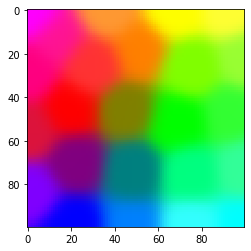

In [5]:
from minisom import MiniSom    
som = MiniSom(100, 100, 3, sigma=10., 
              learning_rate=0.8, 
              neighborhood_function='gaussian')
som.train_random(normRGB, 1000, verbose=True)
plt.imshow(abs(som.get_weights()), interpolation='none')